# Permutation + a full part of LOOCV
# Palleja & Suez species baseline random forest permutation, using interpolated data!!!
## Using vegdist (Bray-Curtis). Both studies from NGless result and rarefied to 190!
## LHS is distance * day, not distance!!
## Time points are realgined between Suez and Palleja!!

## 1. Exploratory Data Analysis

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
species = pd.read_csv("/Users/Jessica/Documents/Lab/Multiple_longitudinal/Microbe_resilience/Interpolate_missing_timepoint/Palleja_Suez_both_ngless_rarefy190_species_baseline_vegdist_bray_interpolated_realigned_timepoint_forML.txt",
                   delimiter = "\t")

In [25]:
species.head()

,Sample_id,recovered_realigned_day,lowest_dist,DistxDay,Timepoint_realign,Study,Perturbance_scale,Shannon,Akkermansia.muciniphila._Akkermansia.muciniphila.CAG.154_Akkermansia.sp..UNK.MGS.1_Akkermansia.sp..54_46_Akkermansia.sp..Phil8_Akkermansia.muciniphila_,Alistipes.finegoldii._Alistipes.finegoldii.CAG.68_Alistipes.finegoldii_Alistipes.sp..HGB5_,...,Veillonella.parvula._Veillonella.parvula_Veillonella.sp..6_1_27_Veillonella.sp..3_1_44_,X_Eubacterium_.eligens._Candidatus.Gastranaerophilales.bacterium.HUM_14__Eubacterium_.eligens_,X_Eubacterium_.eligens._Eubacterium.eligens.CAG.72_Candidatus.Gastranaerophilales.bacterium.HUM_19__Eubacterium_.eligens_,X_Eubacterium_.hallii._Eubacterium.hallii.CAG.12_uncultured.Eubacterium.sp.__Eubacterium_.hallii_,X_Eubacterium_.rectale._Eubacterium.rectale.CAG.36_Eubacterium.sp..41_20__Eubacterium_.rectale_,X_Eubacterium_.siraeum._Eubacterium.siraeum.CAG.80__Eubacterium_.siraeum_,X_Ruminococcus_.torques,bacterium.LF.3._Coprobacillus.sp..CAG.235_bacterium.LF.3_Coprobacillus.sp..CAG.235_29_27_uncultured.Clostridium.sp._,uncultured.Blautia.sp.,uncultured.Clostridium.sp.
0,801,56,0.397590,22.265060,Baseline,Suez,0.725490,2.976085,0,0,...,0,0,0,0,0,0,1,0,0,0
1,802,26,0.316294,8.223642,Baseline,Suez,0.567568,2.840323,0,1,...,0,0,0,1,0,0,0,0,1,0
2,803,38,0.354633,13.476038,Baseline,Suez,0.502994,3.127154,0,0,...,0,0,3,1,4,0,0,0,0,0
3,804,36,0.316770,11.403727,Baseline,Suez,0.640867,3.211491,0,0,...,0,0,3,1,3,0,1,0,0,0
4,805,46,0.585455,26.930909,Baseline,Suez,0.859922,2.979442,0,0,...,0,0,0,0,0,3,5,0,0,1


In [26]:
print(species['Bacteroides.caecimuris'])

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    1
13    0
14    0
15    0
16    0
17    0
18    0
Name: Bacteroides.caecimuris, dtype: int64


In [27]:
num_columns = species.shape[1]
print("Number of columns:", num_columns)

Number of columns: 136


## 2. Set up evaluation environment. Use stratified 5-fold CV to determine the accuracy of the model

In [28]:
my_data = species.drop(columns=['recovered_realigned_day', 'lowest_dist', 'Timepoint_realign', 'Study'])

In [29]:
my_data.head()

,Sample_id,DistxDay,Perturbance_scale,Shannon,Akkermansia.muciniphila._Akkermansia.muciniphila.CAG.154_Akkermansia.sp..UNK.MGS.1_Akkermansia.sp..54_46_Akkermansia.sp..Phil8_Akkermansia.muciniphila_,Alistipes.finegoldii._Alistipes.finegoldii.CAG.68_Alistipes.finegoldii_Alistipes.sp..HGB5_,Alistipes.finegoldii_onderdonkii._Alistipes.sp..CAG.29_Alistipes.sp..AL.1_Alistipes.finegoldii_Alistipes.onderdonkii_,Alistipes.obesi,Alistipes.putredinis._Alistipes.putredinis.CAG.67_Alistipes.putredinis_,Alistipes.shahii._Alistipes.sp..56_sp_Nov_56_25_Alistipes.shahii_,...,Veillonella.parvula._Veillonella.parvula_Veillonella.sp..6_1_27_Veillonella.sp..3_1_44_,X_Eubacterium_.eligens._Candidatus.Gastranaerophilales.bacterium.HUM_14__Eubacterium_.eligens_,X_Eubacterium_.eligens._Eubacterium.eligens.CAG.72_Candidatus.Gastranaerophilales.bacterium.HUM_19__Eubacterium_.eligens_,X_Eubacterium_.hallii._Eubacterium.hallii.CAG.12_uncultured.Eubacterium.sp.__Eubacterium_.hallii_,X_Eubacterium_.rectale._Eubacterium.rectale.CAG.36_Eubacterium.sp..41_20__Eubacterium_.rectale_,X_Eubacterium_.siraeum._Eubacterium.siraeum.CAG.80__Eubacterium_.siraeum_,X_Ruminococcus_.torques,bacterium.LF.3._Coprobacillus.sp..CAG.235_bacterium.LF.3_Coprobacillus.sp..CAG.235_29_27_uncultured.Clostridium.sp._,uncultured.Blautia.sp.,uncultured.Clostridium.sp.
0,801,22.265060,0.725490,2.976085,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,802,8.223642,0.567568,2.840323,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,803,13.476038,0.502994,3.127154,0,0,0,0,0,0,...,0,0,3,1,4,0,0,0,0,0
3,804,11.403727,0.640867,3.211491,0,0,0,0,0,0,...,0,0,3,1,3,0,1,0,0,0
4,805,26.930909,0.859922,2.979442,0,0,0,0,0,0,...,0,0,0,0,0,3,5,0,0,1


In [30]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

## Step 3: Try out Random Forest (within the 5 - Fold CV setup)

In [31]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

In [32]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from collections import OrderedDict

In [33]:
seed = 42

In [34]:
X, y = my_data.drop(columns=['Sample_id', 'DistxDay']), my_data.DistxDay

In [35]:
X.head()

,Perturbance_scale,Shannon,Akkermansia.muciniphila._Akkermansia.muciniphila.CAG.154_Akkermansia.sp..UNK.MGS.1_Akkermansia.sp..54_46_Akkermansia.sp..Phil8_Akkermansia.muciniphila_,Alistipes.finegoldii._Alistipes.finegoldii.CAG.68_Alistipes.finegoldii_Alistipes.sp..HGB5_,Alistipes.finegoldii_onderdonkii._Alistipes.sp..CAG.29_Alistipes.sp..AL.1_Alistipes.finegoldii_Alistipes.onderdonkii_,Alistipes.obesi,Alistipes.putredinis._Alistipes.putredinis.CAG.67_Alistipes.putredinis_,Alistipes.shahii._Alistipes.sp..56_sp_Nov_56_25_Alistipes.shahii_,Anaerostipes.hadrus._Lachnospiraceae.bacterium.CAG.25_Firmicutes.bacterium.CAG.552_39_19_Clostridiales.bacterium.Nov_37_41_Clostridium.sp..SS2_1_Anaerostipes.hadrus_Lachnospiraceae.bacterium.5_1_63FAA_,Anaerostipes.hadrus._uncultured.Eubacterium.sp._Anaerostipes.hadrus_,...,Veillonella.parvula._Veillonella.parvula_Veillonella.sp..6_1_27_Veillonella.sp..3_1_44_,X_Eubacterium_.eligens._Candidatus.Gastranaerophilales.bacterium.HUM_14__Eubacterium_.eligens_,X_Eubacterium_.eligens._Eubacterium.eligens.CAG.72_Candidatus.Gastranaerophilales.bacterium.HUM_19__Eubacterium_.eligens_,X_Eubacterium_.hallii._Eubacterium.hallii.CAG.12_uncultured.Eubacterium.sp.__Eubacterium_.hallii_,X_Eubacterium_.rectale._Eubacterium.rectale.CAG.36_Eubacterium.sp..41_20__Eubacterium_.rectale_,X_Eubacterium_.siraeum._Eubacterium.siraeum.CAG.80__Eubacterium_.siraeum_,X_Ruminococcus_.torques,bacterium.LF.3._Coprobacillus.sp..CAG.235_bacterium.LF.3_Coprobacillus.sp..CAG.235_29_27_uncultured.Clostridium.sp._,uncultured.Blautia.sp.,uncultured.Clostridium.sp.
0,0.725490,2.976085,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.567568,2.840323,0,1,0,0,0,0,3,0,...,0,0,0,1,0,0,0,0,1,0
2,0.502994,3.127154,0,0,0,0,0,0,0,0,...,0,0,3,1,4,0,0,0,0,0
3,0.640867,3.211491,0,0,0,0,0,0,1,1,...,0,0,3,1,3,0,1,0,0,0
4,0.859922,2.979442,0,0,0,0,0,0,2,0,...,0,0,0,0,0,3,5,0,0,1


In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
import random
import math
seed = 42
X, y = my_data.drop(columns=['Sample_id', 'DistxDay']), my_data.DistxDay
kf = KFold(n_splits=5)

In [37]:
# Max_depth = 10, max_features = "log2"
RF_1 = RandomForestRegressor(random_state=seed, max_depth=10, n_estimators= 300, 
                            oob_score=True, max_features = "log2")
result_negMSE_1 = cross_val_score(RF_1, X, y, cv = kf, scoring="neg_mean_absolute_error")
print("Avg kfold neg MSE: {}".format(result_negMSE_1.mean())) #Print average accuracy
output = cross_validate(RF_1, X, y, cv=kf, scoring = 'neg_mean_absolute_error', return_estimator =True)

Avg kfold neg MSE: -4.991368357652799


In [38]:
# R-squared (R2) score for the regression
result_r2 = cross_val_score(RF_1, X, y, cv=kf, scoring="r2")
avg_r2 = round(result_r2.mean(), 3)
print("Avg kfold R2 Score: {}".format(avg_r2))

Avg kfold R2 Score: -3.3


In [39]:
# Get the Spearman's rho for the training data in each cross-validation fold
# Correlating V1-V2 distance and feature baseline abundance
from sklearn.model_selection import KFold
from scipy.stats import spearmanr
import numpy as np

seed = 42
X, y = my_data.drop(columns=['Sample_id','DistxDay']), my_data.DistxDay
kf = KFold(n_splits=5, random_state=seed, shuffle=True)

# Specify the top 10 features 
selected_features = ['Prevotella.copri._Prevotella.copri.CAG.164_Prevotella.copri_',
 'Prevotella.species.incertae.sedis',
 'Roseburia.intestinalis._Roseburia.intestinalis.CAG.13_Roseburia.intestinalis_',
 'Ruminococcus.species.incertae.sedis',
 'Bacteroides.caecimuris',
 'Faecalibacterium.prausnitzii._uncultured.Faecalibacterium.sp._Faecalibacterium.prausnitzii_',
 'Ruminococcus.bicirculans._Ruminococcus.bicirculans_Ruminococcus.sp..CAG.57_Ruminococcus.sp..N15.MGS.57_uncultured.Ruminococcus.sp._',
 'Lachnospiraceae.species.incertae.sedis',
 'Bifidobacterium.ruminantium',
 'Faecalibacterium.sp.._Faecalibacterium.sp..CAG.74_Faecalibacterium.sp..CAG.74_58_120_']

# Initialize lists to store Spearman's rho values for selected features
# Initializes a dictionary where each feature in selected_features is a key, and the corresponding value is an empty list 
spearman_rho_per_feature = {feature: [] for feature in selected_features}

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    for feature in selected_features:
        rho, _ = spearmanr(X_train[feature], y_train)
        spearman_rho_per_feature[feature].append(rho)

# Print mean, std, and range for each selected feature
for feature in selected_features:
    mean_rho = np.mean(spearman_rho_per_feature[feature])
    std_rho = np.std(spearman_rho_per_feature[feature])
    range_str = "({:.2f}, {:.2f})".format(mean_rho - std_rho, mean_rho + std_rho)
    print("Feature: {}, Mean Spearman's rho ± std on Training Data: {:.2f} ± {:.2f} {}".format(feature, mean_rho, std_rho, range_str))

Feature: Prevotella.copri._Prevotella.copri.CAG.164_Prevotella.copri_, Mean Spearman's rho ± std on Training Data: -0.42 ± 0.04 (-0.45, -0.38)
Feature: Prevotella.species.incertae.sedis, Mean Spearman's rho ± std on Training Data: -0.20 ± 0.16 (-0.36, -0.04)
Feature: Roseburia.intestinalis._Roseburia.intestinalis.CAG.13_Roseburia.intestinalis_, Mean Spearman's rho ± std on Training Data: 0.64 ± 0.05 (0.59, 0.69)
Feature: Ruminococcus.species.incertae.sedis, Mean Spearman's rho ± std on Training Data: -0.46 ± 0.10 (-0.57, -0.36)
Feature: Bacteroides.caecimuris, Mean Spearman's rho ± std on Training Data: nan ± nan (nan, nan)
Feature: Faecalibacterium.prausnitzii._uncultured.Faecalibacterium.sp._Faecalibacterium.prausnitzii_, Mean Spearman's rho ± std on Training Data: 0.31 ± 0.05 (0.26, 0.36)
Feature: Ruminococcus.bicirculans._Ruminococcus.bicirculans_Ruminococcus.sp..CAG.57_Ruminococcus.sp..N15.MGS.57_uncultured.Ruminococcus.sp._, Mean Spearman's rho ± std on Training Data: 0.23 ± 0.12

/Users/Jessica/.local/lib/python3.7/site-packages/scipy/stats/stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


### Correlate real Distxday and preidicted Distxday to check model performance

In [14]:
from sklearn.model_selection import cross_val_predict
from scipy.stats import spearmanr
#from scipy.stats import pearsonr

In [15]:
# Get cross-validated predictions for each data point
y_pred = cross_val_predict(RF_1, X, y, cv=kf)

In [16]:
#y_pred

In [17]:
#y

In [18]:
# Calculate the Spearman correlation coefficient for the actual vs. predicted across all individuals
correlation, p_value = spearmanr(y, y_pred)

In [19]:
print(f"Spearman correlation coefficient for all individuals: {correlation:.3f}")
print(f"P-value for the Spearman correlation: {p_value:.3f}")

Spearman correlation coefficient for all individuals: -0.356
P-value for the Spearman correlation: 0.135


Text(8.22364217252396, 23.612659877103038, 'Spearman correlation: -0.36')

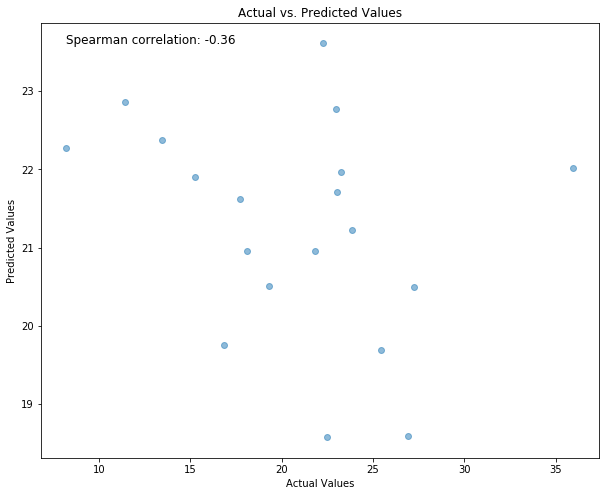

In [20]:
plt.figure(figsize=(10, 8))  # Set the size of the plot
plt.scatter(y, y_pred, alpha=0.5)  # Plot y vs. y_pred

plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Optionally, you can annotate the Spearman correlation on the plot
corr, _ = spearmanr(y, y_pred)
plt.text(min(y), max(y_pred), f'Spearman correlation: {corr:.2f}', fontsize=12)


## Step 4: Permutation
**First shuffle DistxDay against other columns, and then do random forest. Repeat this 1000 times**

In [14]:
# Permutation
from collections import OrderedDict

seed=42
kf = KFold(n_splits=5)
# Max_depth = 10, max_features = "log2", n_estimators=300, the same setting as the one above
RF_shuffle = RandomForestRegressor(random_state=seed, max_depth=10, n_estimators= 300, 
                            oob_score=False, max_features = "log2")

permu_times = 1000

#Create an empty array first
#https://stackoverflow.com/questions/568962/how-do-i-create-an-empty-array-matrix-in-numpy
permutation_negMSE=a = np.empty(shape=(permu_times,1))

for i in range(1, permu_times + 1):
        #First copy my_data using pandas.DataFrame.copy (the correct way to do this!)
        #https://moonbooks.org/Articles/How-to-copy-a-dataframe-with-pandas-in-python-/
        shuffled_data = my_data.copy()

        #Then shuffle data
        shuffled_data['DistxDay'] = shuffled_data['DistxDay'].sample(frac=1, random_state=i).reset_index(drop=True)
        
        #Then run random forest
        X_shuffle, y_shuffle = shuffled_data.drop(columns=['Sample_id','DistxDay']), shuffled_data.DistxDay
        result_negMSE_shuffle = cross_val_score(RF_shuffle, X_shuffle, y_shuffle, cv = kf, scoring="neg_mean_absolute_error")
        
        # Record the neg MSE for each permutation
        negMSE=result_negMSE_shuffle.mean() #Print average negMSE
        permutation_negMSE[i-1]=negMSE

In [15]:
len(permutation_negMSE)

1000

Text(0.5, 1.0, 'Permutation negative MSE histogram')

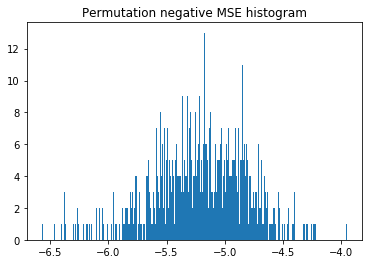

In [16]:
# Plot a histogram
binwidth=0.005
plt.hist(permutation_negMSE, bins=np.arange(min(permutation_negMSE), max(permutation_negMSE) 
                                            + binwidth, binwidth))
plt.title("Permutation negative MSE histogram") 

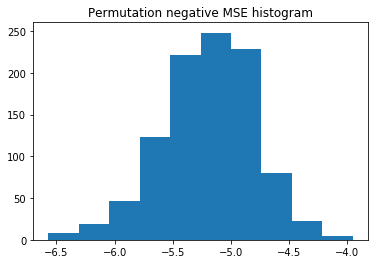

In [17]:
# Calculate area under histogram to get (some sort of) p value
values, bins, _ = plt.hist(permutation_negMSE)
plt.title("Permutation negative MSE histogram") 
area = sum(np.diff(bins)*values)

In [18]:
# What is the p = 0.05 threshold?
np.percentile(permutation_negMSE, 95)

-4.588391323430954

## Step 5: Random Forest (using leave-one-out cross-validation)

In [40]:
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

seed = 42
X, y = my_data.drop(columns=['Sample_id','DistxDay']), my_data.DistxDay

# Initialize LeaveOneOut object
loo = LeaveOneOut()

# Initialize an array of zeros to hold feature importances
# X.shape[1]: This is the number of columns (features)
# loo.get_n_splits(X): This is the number of splits in LOOCV
individual_feature_importances = np.zeros((X.shape[1], loo.get_n_splits(X)))

# Initialize an empty list to hold the negative MAE scores
neg_mae_scores_loo = []

# Initialize an array to store all LOOCV predictions (for correlation of y and y_pred later)
y_preds_array = np.zeros(len(y))

# Loop over the LOOCV folds
for fold, (train_index, test_index) in enumerate(loo.split(X)):
    # Split data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize the model with the same hyperparameters
    RF = RandomForestRegressor(random_state=seed, max_depth=10, n_estimators=300,
                               oob_score=True, max_features="log2")
    # Fit the model
    RF.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = RF.predict(X_test)
    y_preds_array[test_index] = y_pred
    
    # Calculate the MAE for the current fold and append it to the list
    mae = mean_absolute_error(y_test, y_pred)
    neg_mae_scores_loo.append(-mae)  # We negate the MAE to follow your requirement
    
    # Accumulate feature importances for this fold
    individual_feature_importances[:, fold] = RF.feature_importances_

# Calculate median of feature importances
median_importances = np.median(individual_feature_importances, axis=1)

# Sort the mean feature importances in descending order and get the indices
sorted_median_idx = np.argsort(median_importances)[::-1]

# Get the names of the top 10 features based on mean importance
top_10_median_feature_names = X.columns[sorted_median_idx][:10]

# Get the mean importance scores of the top 10 features
top_10_median_importances = median_importances[sorted_median_idx][:10]

# After collecting all predictions, calculate the Spearman correlation
correlation, p_value = spearmanr(y, y_preds_array)

In [41]:
# Print out the negative MAE scores for each fold
#print("Negative MAE scores for each fold: ", neg_mae_scores_loo)

# The average negative MAE score across all folds
print("Average negative MAE: ", np.mean(neg_mae_scores_loo))

Average negative MAE:  -4.756215968439663


In [42]:
individual_feature_importances.shape

(130, 19)

In [43]:
# Print the top 10 features and their importances
# Use zip because top_10_feature_names and top_10_importances are two iterables that we want to loop over simultaneously.
for name, importance in zip(top_10_median_feature_names, top_10_median_importances):
    print(f"{name}: {importance}")

Ruminococcaceae.species.incertae.sedis: 0.030807785910455413
Prevotella.copri._Prevotella.copri.CAG.164_Prevotella.copri_: 0.02738408525490219
Firmicutes.bacterium.CAG.341: 0.02561189649550548
Ruminococcus.bicirculans._Ruminococcus.bicirculans_Ruminococcus.sp..CAG.57_Ruminococcus.sp..N15.MGS.57_uncultured.Ruminococcus.sp._: 0.025313178372068087
Dorea.longicatena._Dorea.sp..42_8_Dorea.longicatena_: 0.02267492321928659
Lachnospiraceae.species.incertae.sedis: 0.020476943326976724
Roseburia.intestinalis._Roseburia.intestinalis.CAG.13_Roseburia.intestinalis_: 0.020272357605389035
Prevotella.species.incertae.sedis: 0.0199837865885893
Blautia.obeum_wexlerae._Ruminococcus.sp..CAG.9_Blautia.sp..Marseille.P2398_Ruminococcus.sp..CAG.9.related_41_34_Blautia.obeum_Blautia.wexlerae_Ruminococcus.sp..5_1_39BFAA_: 0.01964432636319325
Bacteroides.caecimuris: 0.019387483906843004


In [44]:
#Print the correlation rho and p-value
print(f"Spearman correlation: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")


Spearman correlation: 0.000
P-value: 1.000


## Step 4: Permutation for LOOCV
**First shuffle Dist_V1V2 against other columns, and then do random forest. Repeat this 1000 times**

In [45]:
# Define the number of permutations
permu_times = 1000

# Create an empty array to store the neg MAE for each permutation
permutation_negMAE_loo = np.empty(permu_times)

# Initialize LOO cross-validation
loo = LeaveOneOut()

# Initialize the random forest with the specified settings
RF_shuffle_loo = RandomForestRegressor(random_state=seed, max_depth=10, n_estimators=300,
                                       oob_score=False, max_features="log2")

# Run the permutation test with LOO CV
for i in range(permu_times):
    
    # Print the value of i at every 50th iteration so that I know the progress
    # % is modulo calculation
    if i % 50 == 0:
        print(f"Current iteration: {i}")
    
    # Shuffle the 'DistxDay' column
    shuffled_target = my_data['DistxDay'].sample(frac=1, random_state=i).reset_index(drop=True)
    
    # Prepare the data for cross-validation
    X, y_shuffled = my_data.drop(columns=['Sample_id','DistxDay']), shuffled_target
    
    # Variable to accumulate the mean absolute error
    mae_sum = 0
    
    # Perform LOO cross-validation
    for train_index, test_index in loo.split(X):
        # Split the data into train and test for the current fold
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y_shuffled.iloc[train_index], y_shuffled.iloc[test_index]
        
        # Fit the model
        RF_shuffle_loo.fit(X_train, y_train)
        
        # Make predictions
        y_pred = RF_shuffle_loo.predict(X_test)
        
        # Calculate the MAE for the current fold and accumulate it
        mae_sum += mean_absolute_error(y_test, y_pred)
    
    # Calculate the average MAE over all folds and store the negative value
    permutation_negMAE_loo[i] = -mae_sum / loo.get_n_splits(X)

Current iteration: 0
Current iteration: 50
Current iteration: 100
Current iteration: 150
Current iteration: 200
Current iteration: 250
Current iteration: 300
Current iteration: 350
Current iteration: 400
Current iteration: 450
Current iteration: 500
Current iteration: 550
Current iteration: 600
Current iteration: 650
Current iteration: 700
Current iteration: 750
Current iteration: 800
Current iteration: 850
Current iteration: 900
Current iteration: 950


In [46]:
len(permutation_negMAE_loo)

1000

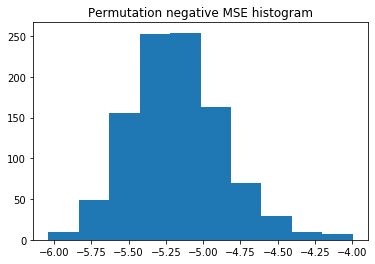

In [47]:
# Calculate area under histogram to get (some sort of) p value
values, bins, _ = plt.hist(permutation_negMAE_loo)
plt.title("Permutation negative MSE histogram") 
area = sum(np.diff(bins)*values)

In [48]:
# What is the p = 0.05 threshold?
np.percentile(permutation_negMAE_loo, 95)

-4.623854965652809

#### See if the RF (LOOCV) is significant

In [49]:
# Calculate the mean of the negative MAE scores from the actual LOOCV
actual_neg_mae_mean = np.mean(neg_mae_scores_loo)

# Calculate the 95th percentile of the negative MAE scores from the permutation test
percentile_95_loo = np.percentile(permutation_negMAE_loo, 95)

# Compare and print the result
if actual_neg_mae_mean > percentile_95_loo: #sig
    print(f"Actual neg MAE ({actual_neg_mae_mean}) is larger than 95% of the neg MAE from permutation ({percentile_95_loo})")
    print("\033[1mRF is significant\033[0m") #bold text
else: #Nonsig
    print(f"Actual neg MAE ({actual_neg_mae_mean}) is smaller than 95% of the neg MAE from permutation ({percentile_95_loo})")
    print("\033[1mRF is nonsignificant\033[0m") #bold text

Actual neg MAE (-4.756215968439663) is smaller than 95% of the neg MAE from permutation (-4.623854965652809)
RF is nonsignificant


In [50]:
# Calculate the percentage of permutation_negMAE_loo that is less than or equal to actual_neg_mae_mean
percentage_loo = np.mean(permutation_negMAE_loo <= actual_neg_mae_mean) * 100
p_value_loo = round(1 - percentage_loo/100, 3)
print(f"The actual_neg_mae_mean is in the {p_value_loo}% percentile of the permutation distribution, so the p value is {p_value_loo}")


The actual_neg_mae_mean is in the 0.098% percentile of the permutation distribution, so the p value is 0.098
